#### Series de Tiempo Proyecto Final 
#### Curso: Análisis de Series de Tiempo con Python

**Estudiante: Richard Douglas**

Modalidad Virtual.  Grow Up Analytics

### Indicaciones Generales

Una serie temporal es una serie de mediciones sobre la misma variable recopiladas a lo largo del tiempo. Estas mediciones se realizan a intervalos de tiempo regulares. Una serie de tiempo es una serie de puntos de datos indexados en orden de tiempo. Más comúnmente, una serie de tiempo es una secuencia tomada en puntos sucesivos igualmente espaciados en el tiempo. Por lo tanto, es una secuencia de datos en tiempo discreto.

Para este proyecto deberás de realizar los siguientes pasos, parte del proceso de una serie temporal.
1)	Exploración de Datos

2)	Revisión de los componentes de la Serie Temporal

3)	Descomposición de una Serie Temporal

4)	Evaluación del Ruido Blanco

5)	Pruebas de Estacionariedad y autocorrelación 

6)	Aplicación de Modelos

a.	Holt – ETS, 
b.	Autorregresivos 

Elige un dataset de los proporcionados y aplica el proyecto.



#### Carga de Librerias

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

### **Data**

La información contenida en el archivo, trae la información de la cantidad de  emisiones de CO2, por mes para los años desde 1973 al 2013.

Qué se busca?

Aplicar lo necesario para observar el comportamiento de los datos de serie de tiempo, así como un modelo que pueda replicar la serie de tiempo y el comportamiento de la misma.

**Carga de la data**

In [2]:
data = pd.read_csv("/content/Emission.csv")
df=data.copy()
df.head()

,Year,Month,CO2 Emission
0,1973,Jan,106.363
1,1973,Feb,101.760
2,1973,Mar,110.553
3,1973,Apr,104.734
4,1973,May,114.897


In [3]:
df.tail()

,Year,Month,CO2 Emission
481,2013,Feb,134.243
482,2013,Mar,153.078
483,2013,Apr,149.442
484,2013,May,156.356
485,2013,Jun,152.814


Inspección del tamaño del dataset

In [4]:
df.shape

(486, 3)

#### **Revisión de valores faltantes o Nulos**

In [5]:
df.isnull().sum()

Year            0
Month           0
CO2 Emission    0
dtype: int64

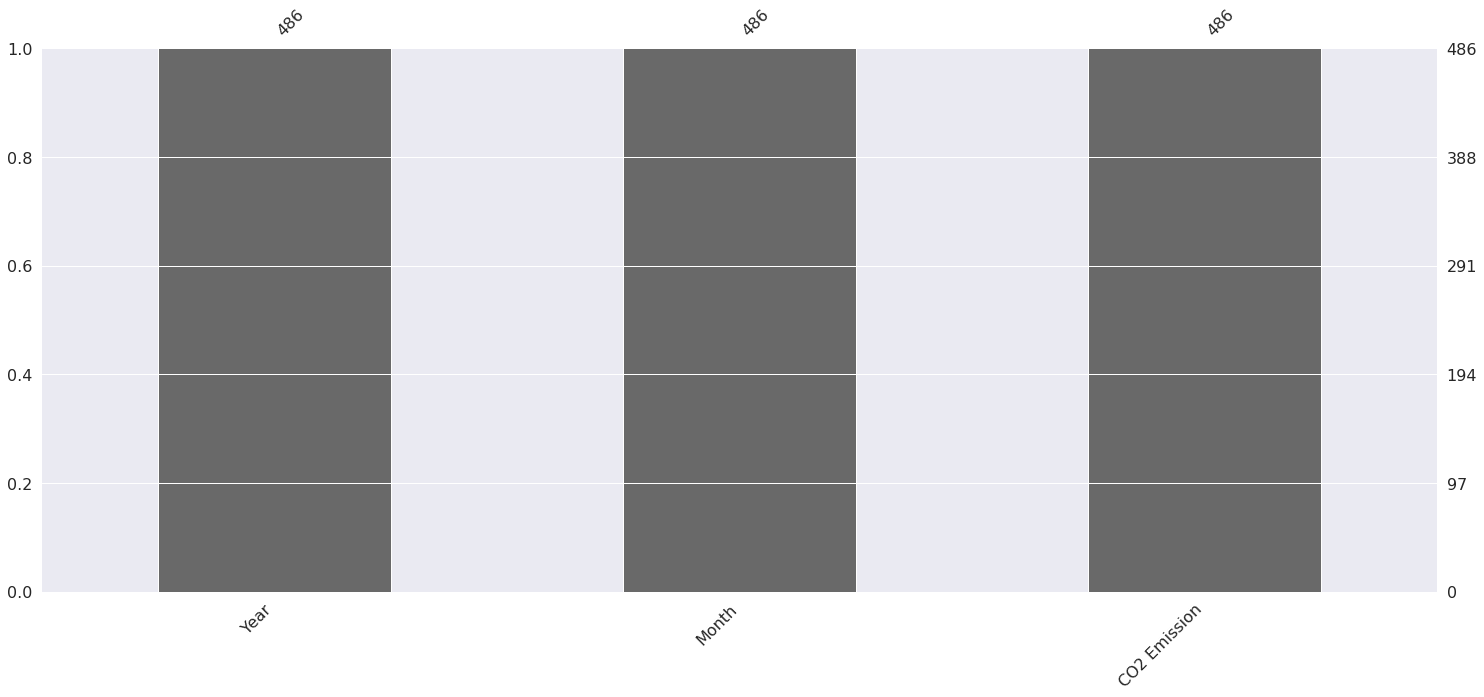

In [6]:
import missingno as msno
msno.bar(df);

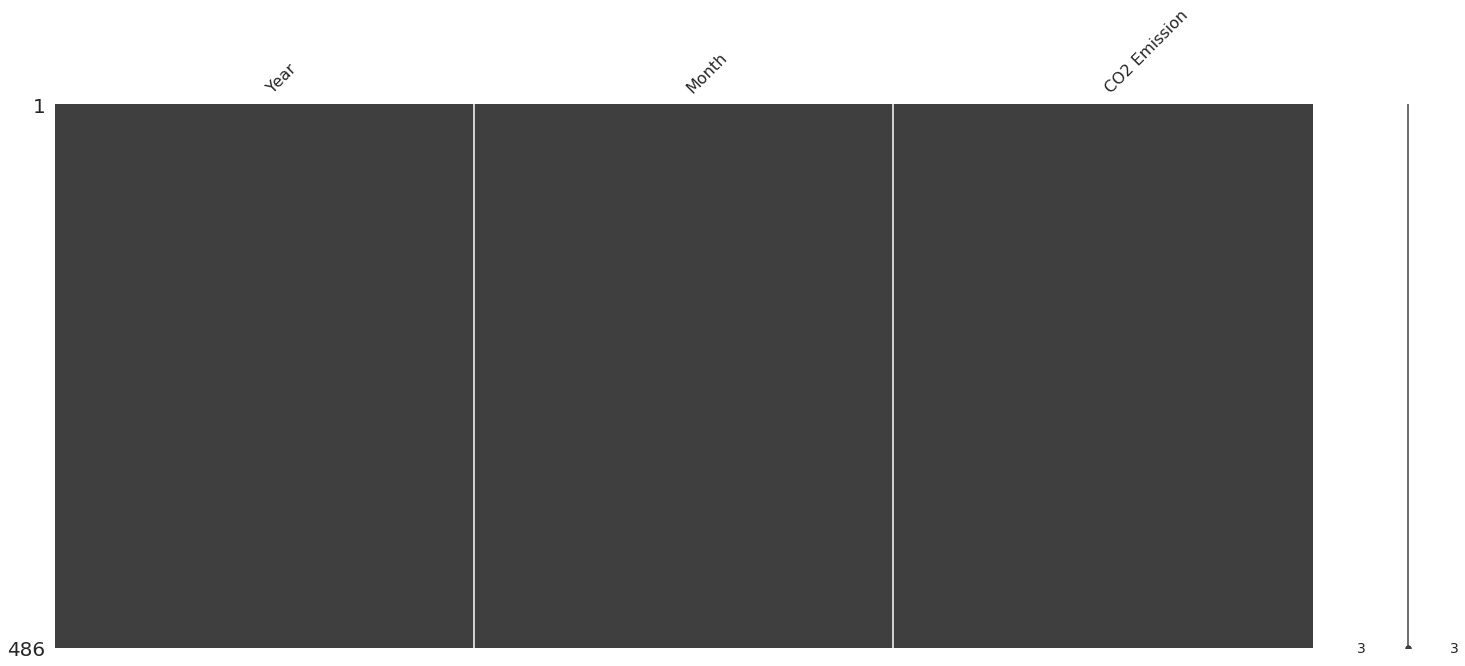

In [7]:
msno.matrix(df)

*Según la revisión anterior no hay valores nulos o faltantes*

**La serie requiere transformaciones en lo que respecta a la fecha**

In [8]:
df['Date'] = df['Year'].astype(str) + '-' + df['Month']
df['Date']  = pd.to_datetime(df['Date'])
df.head()

,Year,Month,CO2 Emission,Date
0,1973,Jan,106.363,1973-01-01
1,1973,Feb,101.760,1973-02-01
2,1973,Mar,110.553,1973-03-01
3,1973,Apr,104.734,1973-04-01
4,1973,May,114.897,1973-05-01


In [9]:
df.shape

(486, 4)

Ahora se tiene la fecha como tal para trabajar la serie de tiempo.

In [10]:
df = df.drop(['Year', 'Month'], axis=1)
df.head()

,CO2 Emission,Date
0,106.363,1973-01-01
1,101.760,1973-02-01
2,110.553,1973-03-01
3,104.734,1973-04-01
4,114.897,1973-05-01


In [11]:
df.shape

(486, 2)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CO2 Emission  486 non-null    float64       
 1   Date          486 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.7 KB


In [13]:
column_names = ['Date','CO2 Emission']
df = df.reindex(columns=column_names)
df.head()

,Date,CO2 Emission
0,1973-01-01,106.363
1,1973-02-01,101.760
2,1973-03-01,110.553
3,1973-04-01,104.734
4,1973-05-01,114.897


In [14]:
df2 = df.copy()

In [15]:
df.set_index("Date", inplace=True)
df.head()

,CO2 Emission
Date,
1973-01-01,106.363
1973-02-01,101.760
1973-03-01,110.553
1973-04-01,104.734
1973-05-01,114.897


In [16]:
df= df.rename(columns={'CO2 Emission':'CO2_Emission'})
df.head()

,CO2_Emission
Date,
1973-01-01,106.363
1973-02-01,101.760
1973-03-01,110.553
1973-04-01,104.734
1973-05-01,114.897


In [17]:
df.shape

(486, 1)

In [18]:
df1 = df.copy()
df1['Mes']=df1.index.month
df1.head()

,CO2_Emission,Mes
Date,,
1973-01-01,106.363,1
1973-02-01,101.760,2
1973-03-01,110.553,3
1973-04-01,104.734,4
1973-05-01,114.897,5


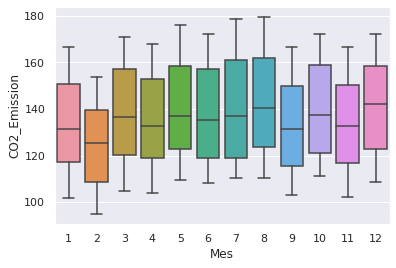

In [19]:
sns.boxplot(data=df1, x='Mes', y='CO2_Emission')

### QQ PLOT

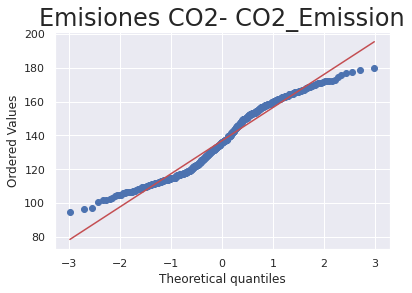

In [20]:
import scipy.stats

scipy.stats.probplot(df.CO2_Emission, plot =  plt)
plt.title("Emisiones CO2- CO2_Emission", size = 24)
plt.show()

### DESCOMPOSICIÓN DE SERIES 

Ya tenemos la serie de datos en el formato que requerimos (date, emission) , adeás verficado que no existen valores nulos, además de indicar la columna Data como el indice.

Se procede con la revisión de componentes de la serie de tiempo, estaionariedad, tendencia.

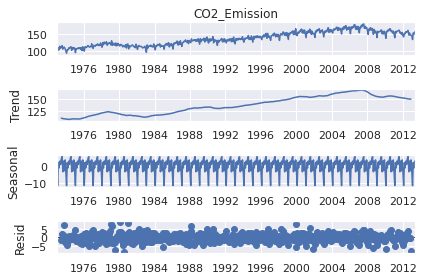

In [21]:
s_desc = seasonal_decompose(df.CO2_Emission)
s_desc.plot()
plt.show()

**Aditiva**

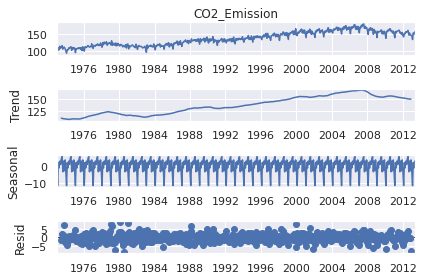

In [22]:
s_dec_additive = seasonal_decompose(df.CO2_Emission, model = "additive")
s_dec_additive.plot()
plt.show()

### ESTACIONARIEDAD

#### RUIDO BLANCO (WHITE NOISE)

In [23]:
wn = np.random.normal(loc = df.CO2_Emission.mean(), scale = df.CO2_Emission.std(), size = len(df))

In [24]:
df['wn'] = wn

In [25]:
df.describe()

,CO2_Emission,wn
count,486.000000,486.000000
mean,136.958300,137.279102
std,19.856571,20.295630
min,94.699000,78.301156
25%,118.778500,124.130666
50%,135.994000,136.754610
75%,154.219500,149.252662
max,179.659000,198.178628


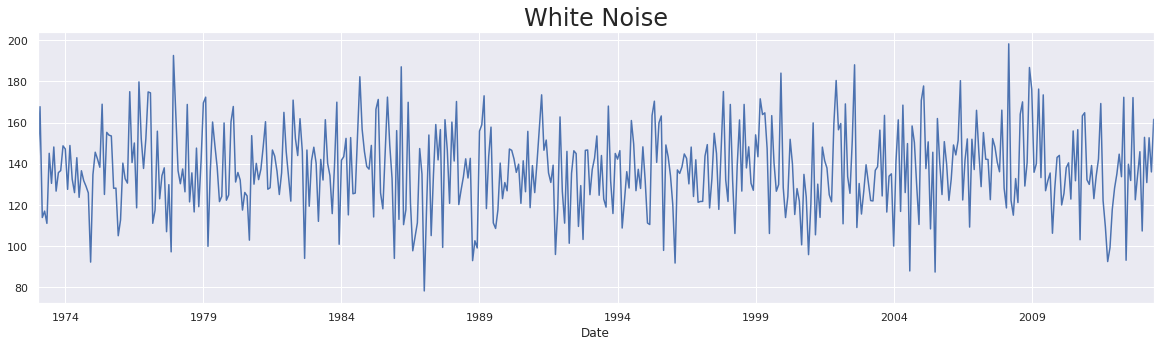

In [26]:
df.wn.plot(figsize = (20,5))
plt.title("White Noise", size= 24)
plt.show()

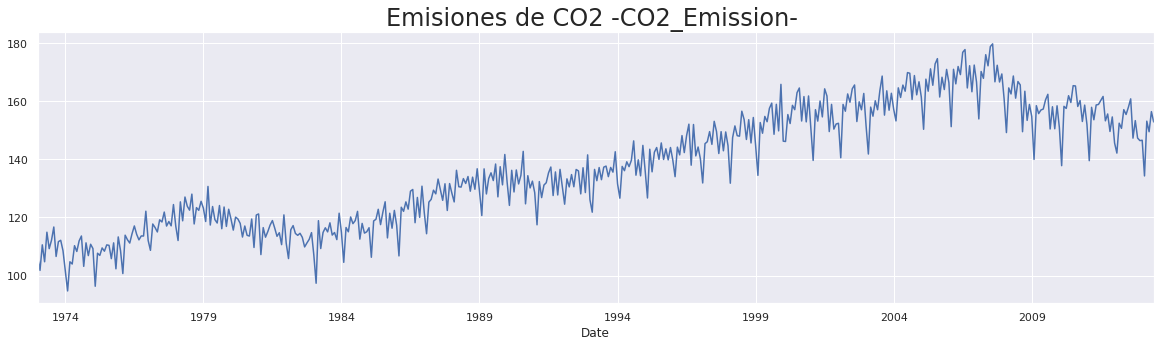

In [27]:
df.CO2_Emission.plot(figsize=(20,5))
plt.title("Emisiones de CO2 -CO2_Emission- ", size = 24)
plt.show()

#### PRUEBAS DE ESTACIONARIEDAD

##### ADF Test：Augmented Dickey-Fuller Test

In [28]:
from statsmodels.tsa.stattools import adfuller

In [29]:
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'n_lags: {result[2]}')
    for key, value in result[4].items():
        print('Critial Values:')
        print(f'   {key}, {value}')
    print(f'Result: The series is {"not " if result[1] > 0.05 else ""}stationary')

In [30]:
adf_test(df.CO2_Emission)

ADF Statistic: -1.7231486969927077
p-value: 0.41922676246341284
n_lags: 17
Critial Values:
   1%, -3.4444002781824477
Critial Values:
   5%, -2.867735576537528
Critial Values:
   10%, -2.57007000456571
Result: The series is not stationary


*La serie de tiempo de las Emisiones de Co2* es **No estacionaria**

In [31]:
adf_test(df.wn)

ADF Statistic: -22.45251005697767
p-value: 0.0
n_lags: 0
Critial Values:
   1%, -3.443905150512834
Critial Values:
   5%, -2.867517732199813
Critial Values:
   10%, -2.569953900520778
Result: The series is stationary


**El ruido blanco** *aplicado para la serie de tiempo de las Emisiones de Co2* es **estacionaria**

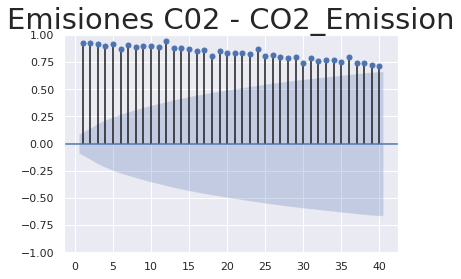

In [32]:
sgt.plot_acf(df.CO2_Emission, lags = 40, zero = False)
plt.title("Emisiones C02 - CO2_Emission", size = 29)
plt.show()

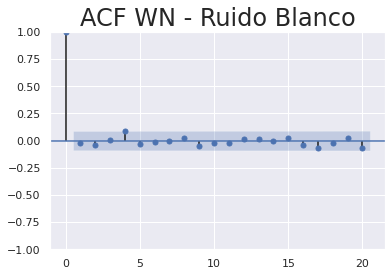

In [33]:
sgt.plot_acf(df.wn, lags = 20, zero = True)
plt.title("ACF WN - Ruido Blanco", size = 24)
plt.show()

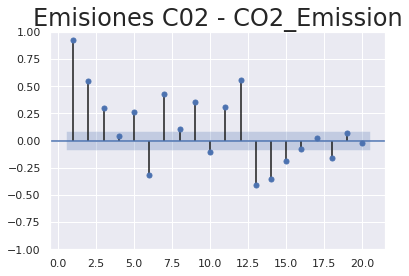

In [34]:
sgt.plot_pacf(df.CO2_Emission, lags = 20, zero = False, method = ('ols'))
plt.title("Emisiones C02 - CO2_Emission", size = 24)
plt.show()

*Según el gráfico anterior los primeros tres tienen una relevancia, mientras que el 4to valor no.*  Vamos a verificar esta información

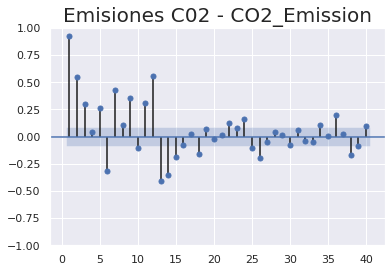

In [35]:
sgt.plot_pacf(df.CO2_Emission, lags = 40, alpha = 0.05, zero = False, method = ('ols'))
plt.title("Emisiones C02 - CO2_Emission", size = 20)
plt.show()

In [36]:
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts 
import warnings
warnings.filterwarnings("ignore")

In [37]:
 autoregressive = ARIMA(df.CO2_Emission, order=(1,0,0))

In [38]:
ajuste =  autoregressive.fit()

In [39]:
ajuste.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           CO2_Emission   No. Observations:                  486
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1669.366
Date:                Tue, 19 Jul 2022   AIC                           3344.732
Time:                        03:48:38   BIC                           3357.291
Sample:                    01-01-1973   HQIC                          3349.666
                         - 06-01-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        136.5912      4.484     30.461      0.000     127.802     145.380
ar.L1          0.9269      0.018     51.795      0.000       0.892       0.962
sigma2        56.1437      4.092     13.720      0.000      48.123      64.164
===================================================================================
Ljung-Box (L1) (Q):                 126.21   Jarque-Bera (JB):                 8.68
Prob(Q):                              0.00   Prob(JB):                         0.01
Heteroskedasticity (H):               1.67   Skew:                             0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### MODELOS AR DE ORDEN SUPERIOR (Higher-Lag) 

In [40]:
autoregressive_2 = ARIMA(df.CO2_Emission, order=(2,0,0))
ajuste_2 =  autoregressive_2.fit()
ajuste_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           CO2_Emission   No. Observations:                  486
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1582.412
Date:                Tue, 19 Jul 2022   AIC                           3172.823
Time:                        03:48:38   BIC                           3189.568
Sample:                    01-01-1973   HQIC                          3179.402
                         - 06-01-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        136.9497      8.257     16.586      0.000     120.766     153.133
ar.L1          0.4192      0.036     11.491      0.000       0.348       0.491
ar.L2          0.5495      0.036     15.076      0.000       0.478       0.621
sigma2        39.1922      2.710     14.463      0.000      33.881      44.503
===================================================================================
Ljung-Box (L1) (Q):                  13.73   Jarque-Bera (JB):                28.60
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.75   Skew:                            -0.59
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [41]:
 autoregressive_3 = ARIMA(df.CO2_Emission, order=(3,0,0))
ajuste_3 =  autoregressive_3.fit()
ajuste_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           CO2_Emission   No. Observations:                  486
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -1559.205
Date:                Tue, 19 Jul 2022   AIC                           3128.410
Time:                        03:48:40   BIC                           3149.341
Sample:                    01-01-1973   HQIC                          3136.633
                         - 06-01-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        134.8365     10.573     12.753      0.000     114.115     155.558
ar.L1          0.2532      0.044      5.821      0.000       0.168       0.338
ar.L2          0.4235      0.040     10.513      0.000       0.345       0.502
ar.L3          0.3023      0.041      7.410      0.000       0.222       0.382
sigma2        35.5988      2.672     13.325      0.000      30.363      40.835
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                27.29
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               1.95   Skew:                            -0.58
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [42]:
 autoregressive_4 = ARIMA(df.CO2_Emission, order=(4,0,0))
ajuste_4 =  autoregressive_4.fit()
ajuste_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           CO2_Emission   No. Observations:                  486
Model:                 ARIMA(4, 0, 0)   Log Likelihood               -1558.828
Date:                Tue, 19 Jul 2022   AIC                           3129.656
Time:                        03:48:42   BIC                           3154.773
Sample:                    01-01-1973   HQIC                          3139.524
                         - 06-01-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        134.6984     11.219     12.007      0.000     112.710     156.687
ar.L1          0.2413      0.047      5.129      0.000       0.149       0.333
ar.L2          0.4069      0.048      8.434      0.000       0.312       0.501
ar.L3          0.2925      0.046      6.304      0.000       0.202       0.383
ar.L4          0.0394      0.063      0.628      0.530      -0.084       0.162
sigma2        35.5433      2.688     13.222      0.000      30.275      40.812
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                30.75
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               1.97   Skew:                            -0.62
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Según el cuadro resumen estadístico. El cuarto **rezago** no tiene relevancia o no aporta al cálculo de los otro valores.

En vista que *ar.L4.CO2_Emission* el valro de P es mayor a 0.05.

#### Test LLR (PRUEBA DE RAZÓN DE VEROSIMILITUD)


Ho: Los modelos son iguales

Ha: Los modelos son diferentes

Si el valor_p es menor al nivel de significancia se rechaza Ho.

In [43]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.llf
    L2 = mod_2.llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

In [44]:
LLR_test(ajuste_2, ajuste_4)

0.0

como el valor dio un 0.0 por lo tant se rechazan Ho, y se acepta la Hipotesis *los modelos son diferentes*

In [45]:
 autoregressive_5 = ARIMA(df.CO2_Emission, order=(5,0,0))
ajuste_5 =  autoregressive_5.fit()
print(ajuste_5.summary())
print("\nLLR test p-value = " + str(LLR_test(ajuste_4, ajuste_5)))

                               SARIMAX Results                                
Dep. Variable:           CO2_Emission   No. Observations:                  486
Model:                 ARIMA(5, 0, 0)   Log Likelihood               -1541.993
Date:                Tue, 19 Jul 2022   AIC                           3097.986
Time:                        03:48:44   BIC                           3127.290
Sample:                    01-01-1973   HQIC                          3109.499
                         - 06-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        136.9403     12.529     10.930      0.000     112.384     161.496
ar.L1          0.2306      0.048      4.782      0.000       0.136       0.325
ar.L2          0.3283      0.049      6.736      0.0

In [46]:
 autoregressive_6 = ARIMA(df.CO2_Emission, order=(6,0,0))
ajuste_6 =  autoregressive_6.fit()
print(ajuste_6.summary())
print("\nLLR test p-value = " + str(LLR_test(ajuste_5, ajuste_6)))

                               SARIMAX Results                                
Dep. Variable:           CO2_Emission   No. Observations:                  486
Model:                 ARIMA(6, 0, 0)   Log Likelihood               -1516.829
Date:                Tue, 19 Jul 2022   AIC                           3049.658
Time:                        03:48:45   BIC                           3083.148
Sample:                    01-01-1973   HQIC                          3062.815
                         - 06-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        136.9467     10.494     13.050      0.000     116.379     157.514
ar.L1          0.3126      0.044      7.068      0.000       0.226       0.399
ar.L2          0.3217      0.041      7.831      0.0

In [47]:
 autoregressive_7 = ARIMA(df.CO2_Emission, order=(7,0,0))
ajuste_7 =  autoregressive_7.fit()
print(ajuste_7.summary())
print("\nLLR test p-value = " + str(LLR_test(ajuste_6, ajuste_7)))

                               SARIMAX Results                                
Dep. Variable:           CO2_Emission   No. Observations:                  486
Model:                 ARIMA(7, 0, 0)   Log Likelihood               -1468.408
Date:                Tue, 19 Jul 2022   AIC                           2954.817
Time:                        03:48:48   BIC                           2992.493
Sample:                    01-01-1973   HQIC                          2969.619
                         - 06-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        136.9379     14.048      9.748      0.000     109.404     164.472
ar.L1          0.4474      0.044     10.270      0.000       0.362       0.533
ar.L2          0.1791      0.043      4.124      0.0

In [48]:
 autoregressive_8 = ARIMA(df.CO2_Emission, order=(8,0,0))
ajuste_8 =  autoregressive_8.fit()
print(ajuste_8.summary())
print("\nLLR test p-value = " + str(LLR_test(ajuste_7, ajuste_8)))

                               SARIMAX Results                                
Dep. Variable:           CO2_Emission   No. Observations:                  486
Model:                 ARIMA(8, 0, 0)   Log Likelihood               -1465.918
Date:                Tue, 19 Jul 2022   AIC                           2951.837
Time:                        03:48:51   BIC                           2993.699
Sample:                    01-01-1973   HQIC                          2968.283
                         - 06-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        136.9360     14.887      9.199      0.000     107.759     166.113
ar.L1          0.4039      0.047      8.570      0.000       0.311       0.496
ar.L2          0.2249      0.050      4.533      0.0

Vamos a dejar el ajsute 8 como el último nivel. en este caso.

In [49]:
 autoregressive_9 = ARIMA(df.CO2_Emission, order=(9,0,0))
ajuste_9 =  autoregressive_9.fit()
print(ajuste_9.summary())
print("\nLLR test p-value = " + str(LLR_test(ajuste_8, ajuste_9)))

                               SARIMAX Results                                
Dep. Variable:           CO2_Emission   No. Observations:                  486
Model:                 ARIMA(9, 0, 0)   Log Likelihood               -1435.345
Date:                Tue, 19 Jul 2022   AIC                           2892.690
Time:                        03:48:54   BIC                           2938.739
Sample:                    01-01-1973   HQIC                          2910.781
                         - 06-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        136.9311     17.918      7.642      0.000     101.813     172.049
ar.L1          0.3686      0.046      7.938      0.000       0.278       0.460
ar.L2          0.0936      0.049      1.916      0.0

#### *Analisis de Residuos**

In [50]:
df['res_emission'] = ajuste_8.resid
df.head()

,CO2_Emission,wn,res_emission
Date,,,
1973-01-01,106.363,136.199043,-30.572978
1973-02-01,101.760,167.695269,-6.594008
1973-03-01,110.553,113.930358,5.222247
1973-04-01,104.734,117.034722,-1.324893
1973-05-01,114.897,111.087140,7.969361


In [51]:
sts.adfuller(df.res_emission)

(-4.413508076789111,
 0.00028091279129184343,
 17,
 468,
 {'1%': -3.4444002781824477,
  '10%': -2.57007000456571,
  '5%': -2.867735576537528},
 2435.1414337209603)

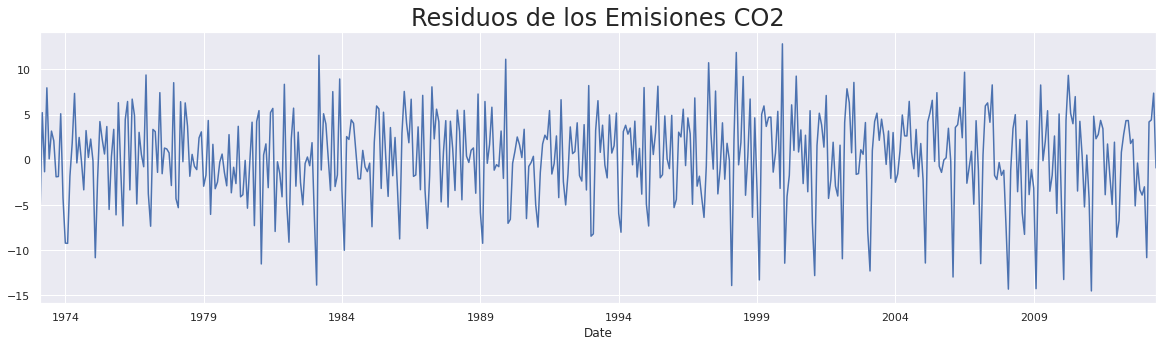

In [52]:
df.res_emission[1:].plot(figsize=(20,5))
plt.title("Residuos de los Emisiones CO2",size=24)
plt.show()

In [53]:
adf_test(df.res_emission)

ADF Statistic: -4.413508076789111
p-value: 0.00028091279129184343
n_lags: 17
Critial Values:
   1%, -3.4444002781824477
Critial Values:
   5%, -2.867735576537528
Critial Values:
   10%, -2.57007000456571
Result: The series is stationary


*Tal parece los Residuos aplicados a la serie de tiempo de Emisiones de CO2 son* **Estacionarios** 

### SUAVIZAMIENTO EXPONENCIAL

In [54]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

span = 12 # span indica la cantidad de periodos mensuales
alpha = 2/(span+1)

df['EWMA12'] = df['CO2_Emission'].ewm(alpha=alpha,adjust=False).mean()
df['SES12']= SimpleExpSmoothing(df['CO2_Emission']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
df.head()

,CO2_Emission,wn,res_emission,EWMA12,SES12
Date,,,,,
1973-01-01,106.363,136.199043,-30.572978,106.363000,106.363000
1973-02-01,101.760,167.695269,-6.594008,105.654846,105.654846
1973-03-01,110.553,113.930358,5.222247,106.408408,106.408408
1973-04-01,104.734,117.034722,-1.324893,106.150807,106.150807
1973-05-01,114.897,111.087140,7.969361,107.496375,107.496375


#### Suavizado exponencial doble

In [55]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df['DESadd12'] = ExponentialSmoothing(df['CO2_Emission'], trend = 'add').fit().fittedvalues.shift(-1)
df.head()

,CO2_Emission,wn,res_emission,EWMA12,SES12,DESadd12
Date,,,,,,
1973-01-01,106.363,136.199043,-30.572978,106.363000,106.363000,107.369791
1973-02-01,101.760,167.695269,-6.594008,105.654846,105.654846,106.456125
1973-03-01,110.553,113.930358,5.222247,106.408408,106.408408,107.278621
1973-04-01,104.734,117.034722,-1.324893,106.150807,106.150807,106.913200
1973-05-01,114.897,111.087140,7.969361,107.496375,107.496375,108.430923


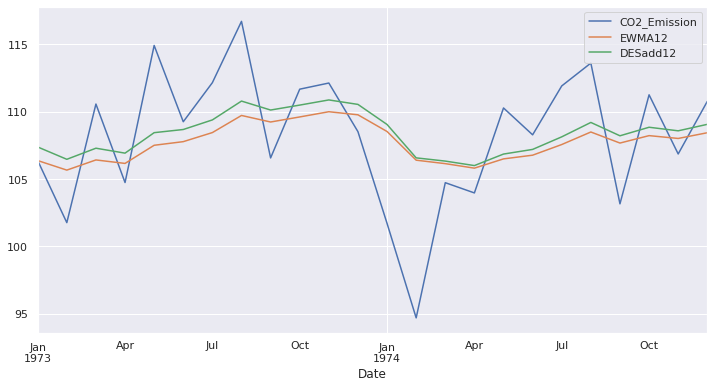

In [56]:
df[['CO2_Emission','EWMA12','DESadd12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

In [57]:
df['DESmul12'] = ExponentialSmoothing(df['CO2_Emission'], trend='mul').fit().fittedvalues.shift(-1)
df.head()

,CO2_Emission,wn,res_emission,EWMA12,SES12,DESadd12,DESmul12
Date,,,,,,,
1973-01-01,106.363,136.199043,-30.572978,106.363000,106.363000,107.369791,107.440700
1973-02-01,101.760,167.695269,-6.594008,105.654846,105.654846,106.456125,106.474460
1973-03-01,110.553,113.930358,5.222247,106.408408,106.408408,107.278621,107.273918
1973-04-01,104.734,117.034722,-1.324893,106.150807,106.150807,106.913200,106.876010
1973-05-01,114.897,111.087140,7.969361,107.496375,107.496375,108.430923,108.389215


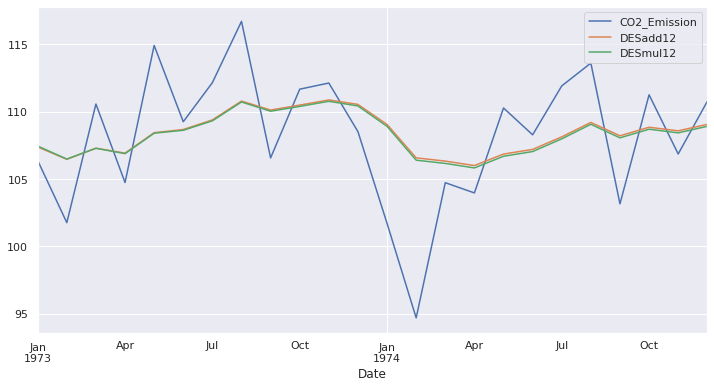

In [58]:
df[['CO2_Emission','DESadd12','DESmul12']].iloc[:24].plot(figsize=(12,6));

En lo personal no me gusta el acomodo del resultado.

#### Prediccion

In [59]:
model_add = ExponentialSmoothing(df['CO2_Emission'],trend='add',seasonal='add',seasonal_periods=12).fit()

In [60]:
model_mul = ExponentialSmoothing(df['CO2_Emission'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

In [61]:
forecast_add = model_add.forecast(24)
forecast_mul= model_mul.forecast(24)

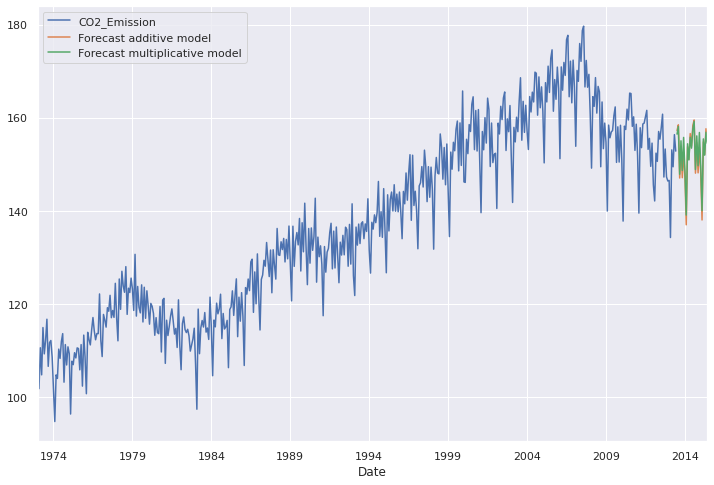

In [62]:
df['CO2_Emission'].plot(figsize=(12,8))
forecast_add.plot(label='Forecast additive model');
forecast_mul.plot(label='Forecast multiplicative model');
plt.legend(loc='upper left');

Sin embargo esta proyeccion me agrada en como se comporta en una similitud a los datos originales

### Facebook prophet

In [65]:
import pandas as pd
from fbprophet import Prophet

In [66]:
df2.columns = ['ds','y']
df2['ds'] = pd.to_datetime(df2['ds'])
df2.head()

,ds,y
0,1973-01-01,106.363
1,1973-02-01,101.760
2,1973-03-01,110.553
3,1973-04-01,104.734
4,1973-05-01,114.897


In [67]:
modelo = Prophet() 
modelo.fit(df2) # el ajuste del modelo

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [68]:
future = modelo.make_future_dataframe(periods=24,freq = 'MS') # frecuencia mensual
future.head()

,ds
0,1973-01-01
1,1973-02-01
2,1973-03-01
3,1973-04-01
4,1973-05-01


In [69]:
forecast = modelo.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
505,2015-02-01,147.682346,131.423886,140.681384,147.068368,148.469566,-11.611180,-11.611180,-11.611180,-11.611180,-11.611180,-11.611180,0.0,0.0,0.0,136.071166
506,2015-03-01,147.528348,144.808118,153.660289,146.831217,148.388514,1.585638,1.585638,1.585638,1.585638,1.585638,1.585638,0.0,0.0,0.0,149.113986
507,2015-04-01,147.357851,140.422132,149.087291,146.593795,148.279208,-2.444023,-2.444023,-2.444023,-2.444023,-2.444023,-2.444023,0.0,0.0,0.0,144.913828
508,2015-05-01,147.192854,145.213093,154.397555,146.363437,148.182521,2.510194,2.510194,2.510194,2.510194,2.510194,2.510194,0.0,0.0,0.0,149.703048
509,2015-06-01,147.022357,143.154116,152.494868,146.120310,148.075469,0.928034,0.928034,0.928034,0.928034,0.928034,0.928034,0.0,0.0,0.0,147.950391


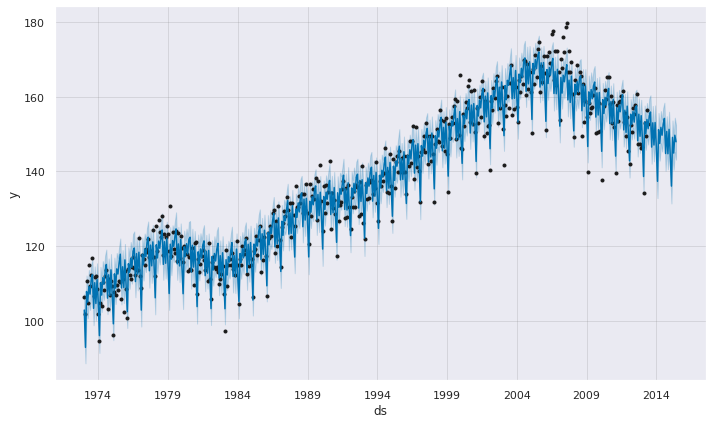

In [70]:
modelo.plot(forecast);

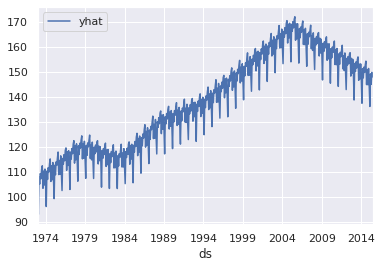

In [72]:
forecast.plot(x='ds',y='yhat');

Observar los componenetes del modelo - del Forecast

*  Tendencia
*  Estacionalidad

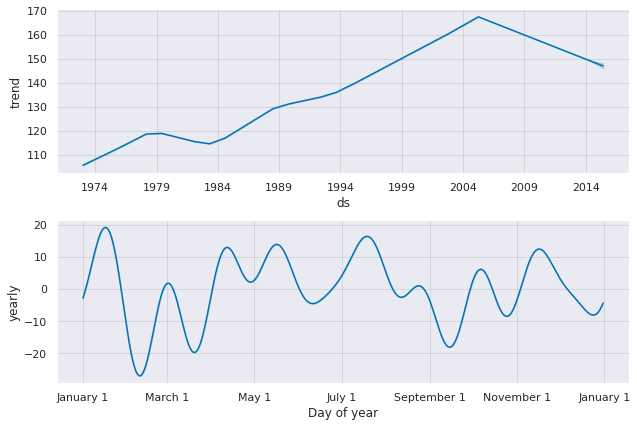

In [73]:
modelo.plot_components(forecast);

### Prueba adicional - Prediccion de los valores

In [74]:
df2.head()

,ds,y
0,1973-01-01,106.363
1,1973-02-01,101.760
2,1973-03-01,110.553
3,1973-04-01,104.734
4,1973-05-01,114.897


In [76]:
df2.columns = ['Date','CO2_Emission']
df2.head()

,Date,CO2_Emission
0,1973-01-01,106.363
1,1973-02-01,101.760
2,1973-03-01,110.553
3,1973-04-01,104.734
4,1973-05-01,114.897


In [77]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings("ignore")
sns.set()

In [81]:
df2['ret_emission'] = df2.CO2_Emission.pct_change(1).mul(100)

In [82]:
size = int(len(df)*0.8)
df2_train, df2_test = df2.iloc[:size], df2.iloc[size:]

In [83]:
df2.head()

,Date,CO2_Emission,ret_emission
0,1973-01-01,106.363,NaN
1,1973-02-01,101.760,-4.327633
2,1973-03-01,110.553,8.640920
3,1973-04-01,104.734,-5.263539
4,1973-05-01,114.897,9.703630


In [86]:
df2.tail()

,Date,CO2_Emission,ret_emission
481,2013-02-01,134.243,-8.377185
482,2013-03-01,153.078,14.030527
483,2013-04-01,149.442,-2.375260
484,2013-05-01,156.356,4.626544
485,2013-06-01,152.814,-2.265343


In [84]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [85]:
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
#from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

In [87]:
# Crear Fechas
start_date = "2007-06-01"
end_date = "2012-06-01"

##### ESTACIONALIDAD

In [88]:
from pmdarima.arima.utils import ndiffs

ndiffs(df.ret_emission[1:], test = "pp")

0

#### ARIMAX

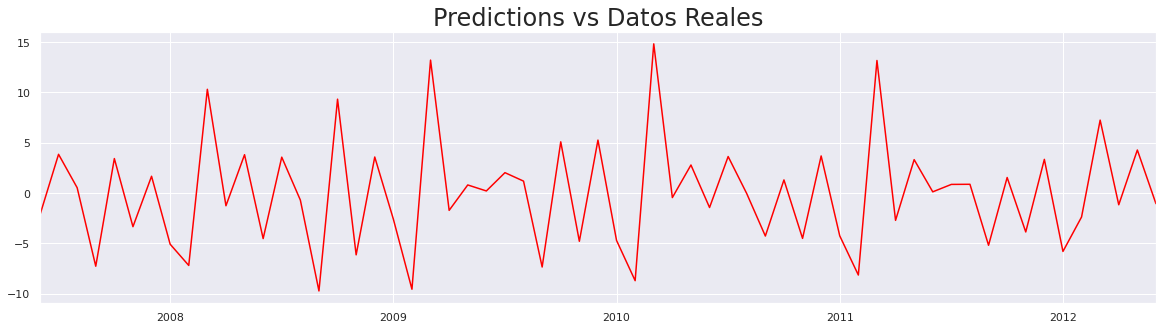

In [91]:
model_ret_armax = ARIMA(df.ret_emission[1:], exog = df[["ret_emission"]][1:], order = (1,0,1))
results_ret_armax = model_ret_armax.fit()

df_pred_armax = results_ret_armax.predict(start = start_date, end = end_date, 
                                          exog = df_test[["ret_emission"]][start_date:end_date]) 

df_pred_armax[start_date:end_date].plot(figsize = (20,5), color = "red")

plt.title("Predictions vs Datos Reales", size = 24)
plt.show()

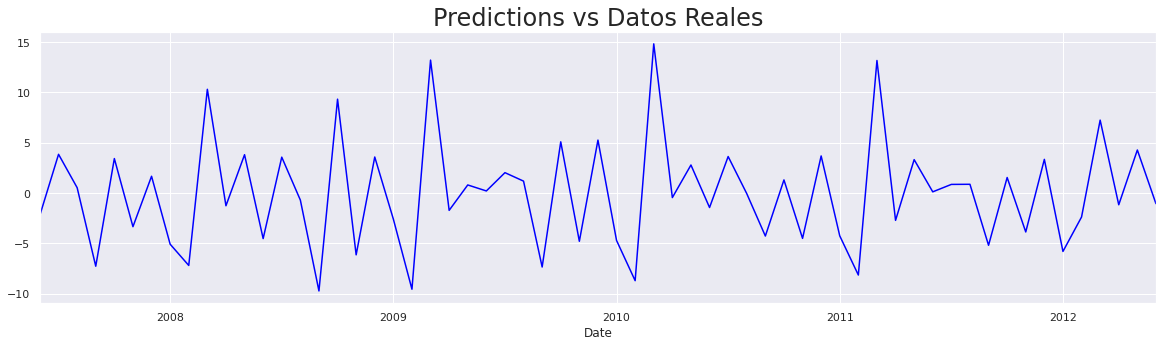

In [95]:
df_test.ret_emission[start_date:end_date].plot(figsize = (20,5),color = "blue")
plt.title("Predictions vs Datos Reales", size = 24)
plt.show()